## Visualizando os conjuntos de dados

> Autor: Dayvson Silva

> Data: 03/09/2020

## Importando as bibliotecas usadas nas tarefas

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

## Lendo os arquivos com numpy

### Visualizando o shape dos arquivos

In [2]:
def show_shape(full_path, file_data):
    array = np.fromfile(file=full_path)
    print("No arquivo", file_data, "tem", array.shape, "itens.")

def run_files_data(path_data = ''):
    for file_data in os.listdir(path_data):
        full_path = os.path.join(path_data, file_data)
        show_shape(full_path, file_data)

In [3]:
run_files_data('rna-2020.1-pp2-data/')

No arquivo data0.txt tem (1750,) itens.
No arquivo data1.txt tem (1800,) itens.
No arquivo data2.txt tem (1800,) itens.
No arquivo data3.txt tem (1800,) itens.
No arquivo dataAll.txt tem (3000,) itens.
No arquivo dataHoldout.txt tem (2400,) itens.


### visualizando o conteúdo dos arquivos

In [4]:
np.fromfile('rna-2020.1-pp2-data\data0.txt')

array([1.49351310e-03, 4.78163211e-04, 0.00000000e+00, ...,
       1.55399036e+88, 4.76792279e-04, 3.05175781e-05])

In [5]:
np.fromfile('rna-2020.1-pp2-data\data1.txt')

array([ 0.13658687, -0.16460088,  0.        , ...,  0.99252852,
        1.06937678,  1.        ])

In [6]:
np.fromfile('rna-2020.1-pp2-data\data2.txt')

array([ 0.00553719, -0.02079496,  1.        , ...,  0.99828858,
        0.99300766,  0.        ])

In [7]:
np.fromfile('rna-2020.1-pp2-data\data3.txt')

array([ 0.06162809, -0.1242566 ,  0.        , ...,  1.05935906,
        0.93900834,  1.        ])

In [8]:
np.fromfile('rna-2020.1-pp2-data\dataAll.txt')

array([-363.7884,  244.1423,    0.    , ..., -140.147 ,  734.0983,
          0.    ])

In [9]:
np.fromfile('rna-2020.1-pp2-data\dataHoldout.txt')

array([-0.29322959, -0.09065359,  1.        , ...,  0.72930655,
        0.93224271,  0.        ])

## Reshape os conjuntos de dados

In [ ]:
def reshape_dataset(full_path):
    try:
        array = np.fromfile(full_path)
        number_samples = array.shape[0]//3
        array = array.reshape(number_samples, 3)
        return array
    except:
        return ''

def run_files_data(path_data):
    datasets_list = []
    for file_data in os.listdir(path_data):
        full_path = os.path.join(path_data, file_data)
        dataset = reshape_dataset(full_path)
        if dataset != '':
            datasets_list.append(dataset)
    return datasets_list

In [30]:
datasets = run_files_data('rna-2020.1-pp2-data/')

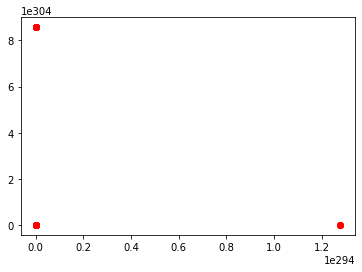

In [71]:
file_data = np.fromfile('rna-2020.1-pp2-data/data0.txt')
k = 0
for i in range(0, 800, 3):
    for j in range(k, i):
        k = i
        #pprint(file_data[j])#, end='\t\t\t')
        plt.plot(file_data[k],file_data[k+1], 'ro')

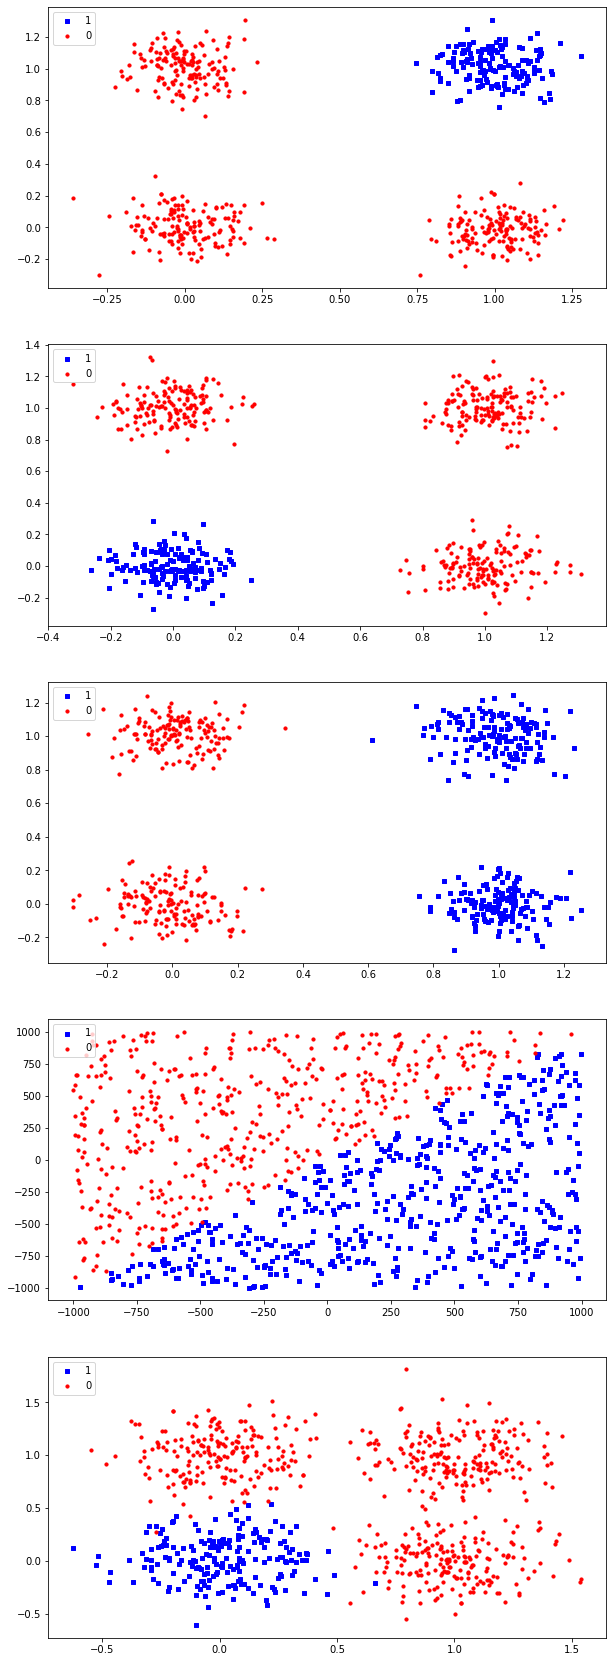

In [72]:
fig = plt.figure(figsize=(10, 30))
number_dataset = 1
for dataset in datasets:
   x = dataset[:,0]
   y = dataset[:,1]
   ax1 = fig.add_subplot(5,1,number_dataset)
   ax1.scatter(x[dataset[:,2] == 1.0], y[dataset[:,2] == 1.0], s=10, c='b', marker="s", label='1')
   ax1.scatter(x[dataset[:,2] == 0.0], y[dataset[:,2] == 0.0], s=10, c='r', marker="o", label='0')
   plt.legend(loc='upper left')
   number_dataset += 1
plt.savefig('images/datasets.png')
plt.show()